In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

### Reading data

In [141]:
ratings = pd.read_table('ratings.dat',sep = r'::',engine='python',header=None,names = ['UserID','MovieID','Rating','Timestamp'])
users = pd.read_table('users.dat',sep = r'::',engine='python',header=None, names =['UserID','Gender','Age','Occupation','Zip-code'])
movies = pd.read_table('movies.dat',sep = r'::',engine='python',header=None, names = ['MovieID','Title','Genres'], index_col = 'MovieID')


### A

In [142]:
movies.shape[0]

3883

### B

In [144]:
movies['Title'].head()

MovieID
1                      Toy Story (1995)
2                        Jumanji (1995)
3               Grumpier Old Men (1995)
4              Waiting to Exhale (1995)
5    Father of the Bride Part II (1995)
Name: Title, dtype: object

In [145]:
movies[['Title','Year']] = movies['Title'].str.extract("(.*)\((\d+)\)")

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [146]:
movies['Year'] = np.where(movies['Year'].isna(),-1,movies['Year']) #where NaN change to -1

In [147]:
movies['Year'] = movies['Year'].astype(int)

In [148]:
movie_counts_year = movies['Year'].value_counts()
movie_counts_year = movie_counts_year.sort_index(ascending = False)
movie_counts_year.tail()

1923    3
1922    2
1921    1
1920    2
1919    3
Name: Year, dtype: int64

### C


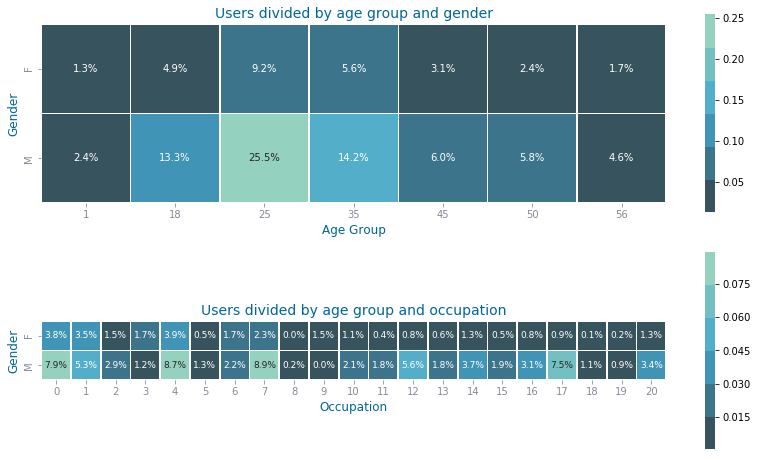

In [149]:
Gender_Ages_cross = pd.crosstab(users['Gender'],users['Age'],normalize=True)
Gender_Occupation_cross = pd.crosstab(users['Gender'],users['Occupation'],normalize = True)

Gender_Ages_pivot = pd.pivot_table(data = users[['Gender','Age']],index = ['Gender'],columns = ['Age'],aggfunc=np.size)


f, ax = plt.subplots(2,1,figsize=(14, 8)) #one subplot
sns.heatmap(Gender_Ages_cross,linewidth=0.5,square = True,cmap=sns.color_palette("GnBu_d"),annot=True,
            ax=ax[0],fmt='.1%')
ax[0].set_ylabel('Gender', fontsize=12,color = '#006699')
ax[0].set_xlabel('Age Group',fontsize=12,color = '#006699')
ax[0].set_title('Users divided by age group and gender',fontsize=14,color = '#006699')
ax[0].tick_params(colors='#888899')

sns.heatmap(Gender_Occupation_cross,linewidth=0.75,square = True,cmap=sns.color_palette("GnBu_d"),annot=True, annot_kws={"size":9},
            ax=ax[1],fmt='.1%')
ax[1].set_ylabel('Gender', fontsize=12,color = '#006699')
ax[1].set_xlabel('Occupation',fontsize=12,color = '#006699')
ax[1].set_title('Users divided by age group and occupation',fontsize=14,color = '#006699')
ax[1].tick_params(colors='#888899')



### D

In [150]:
Genres = movies['Genres'].str.split('|')
Genres = pd.Series(np.array([x for lst in Genres for x in lst]))
Genres.value_counts()

### 2nd approach
Genres2 = pd.Series(movies['Genres'].str.split('|',expand = True).values.ravel())
Genres2.value_counts()

### 3nd approach
Genres3 = pd.Series(np.concatenate(np.array(movies['Genres'].str.split('|',expand = False))))
Genres3.value_counts()

### 4th approach - we still have movie id here (if needed)
Genres4 = pd.DataFrame(movies['Genres'].str.split('|',expand = True))
Genres4 = Genres4.stack()

In [151]:
Genres.value_counts()

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

### E

In [152]:
movies_rating = movies.merge(ratings,left_index = True, right_on = 'MovieID',how='left')

In [155]:
ranking = movies_rating.groupby('Title').mean()
ranking['Rating'].nlargest(20)

Title
Baby, The                                                        5.000000
Bittersweet Motel                                                5.000000
Follow the Bitch                                                 5.000000
Gate of Heavenly Peace, The                                      5.000000
Lured                                                            5.000000
One Little Indian                                                5.000000
Schlafes Bruder (Brother of Sleep)                               5.000000
Smashing Time                                                    5.000000
Song of Freedom                                                  5.000000
Ulysses (Ulisse)                                                 5.000000
I Am Cuba (Soy Cuba/Ya Kuba)                                     4.800000
Lamerica                                                         4.750000
Apple, The (Sib)                                                 4.666667
Sanjuro                         

### F

In [156]:
ranking_count = movies_rating.groupby('Title').size()
ranking_count = ranking_count[ranking_count > 100]

movies_over_100 = ranking.loc[np.array(ranking_count.index),:]
movies_over_100['Rating'].nlargest(5)

Title
Seven Samurai (The Magnificent Seven) (Shichinin no samurai)     4.560510
Shawshank Redemption, The                                        4.554558
Godfather, The                                                   4.524966
Close Shave, A                                                   4.520548
Usual Suspects, The                                              4.517106
Name: Rating, dtype: float64

### G

In [157]:
movies_rating = movies_rating.merge(users[['UserID','Gender']], how = 'left', on ='UserID')

In [158]:
ranking_count = movies_rating.groupby(['Gender','Title'])['Rating'].count()
ranking_count

Gender  Title                                   
F       $1,000,000 Duck                               16
        'Night Mother                                 36
        'Til There Was You                            37
        'burbs, The                                   92
        ...And Justice for All                        35
        1-900                                          1
        10 Things I Hate About You                   232
        101 Dalmatians                               337
        12 Angry Men                                 141
        13th Warrior, The                            125
        187                                            7
        2 Days in the Valley                          45
        20 Dates                                      29
        20,000 Leagues Under the Sea                  97
        200 Cigarettes                                71
        2001: A Space Odyssey                        344
        2010                           

In [159]:
ranking_count = ranking_count[ranking_count > 100]

In [160]:
ranking_gender = movies_rating.groupby(['Gender','Title']).mean()

In [161]:
gender_over_100 = ranking_gender.loc[np.array(ranking_count.index),:]

In [162]:
gender_over_100.groupby(['Gender','Title']).mean().sort_values(by=(['Rating']),ascending=False).head()

Year  MovieID  \
Gender Title                                                                 
F      Close Shave, A                                      1995.0    745.0   
       Wrong Trousers, The                                 1993.0   1148.0   
M      Godfather, The                                      1972.0    858.0   
       Seven Samurai (The Magnificent Seven) (Shichini...  1954.0   2019.0   
F      Sunset Blvd. (a.k.a. Sunset Boulevard)              1950.0    922.0   

                                                             Rating  \
Gender Title                                                          
F      Close Shave, A                                      4.644444   
       Wrong Trousers, The                                 4.588235   
M      Godfather, The                                      4.583333   
       Seven Samurai (The Magnificent Seven) (Shichini...  4.576628   
F      Sunset Blvd. (a.k.a. Sunset Boulevard)              4.572650   

                                                              Timestamp  
Gender Title                                                             
F      Close Shave, A                                      9.696593e+08  
       Wrong Trousers, The                                 9.710288e+08  
M      Godfather, The                                      9.711650e+08  
       Seven Samurai (The Magnificent Seven) (Shichini...  9.721066e+08  
F      Sunset Blvd. (a.k.a. Sunset Boulevard)              9.733797e+08

In [163]:
gender_over_100.loc['M',:].sort_values(by='Rating',ascending=False).head()

,Year,MovieID,Rating,Timestamp
Title,,,,
"Godfather, The",1972.0,858.0,4.583333,9.711650e+08
Seven Samurai (The Magnificent Seven) (Shichinin no samurai),1954.0,2019.0,4.576628,9.721066e+08
"Shawshank Redemption, The",1994.0,318.0,4.560625,9.711810e+08
Raiders of the Lost Ark,1981.0,1198.0,4.520597,9.707760e+08
"Usual Suspects, The",1995.0,50.0,4.518248,9.714935e+08


In [164]:
gender_over_100.loc['F',:].sort_values(by='Rating',ascending=False).head()

,Year,MovieID,Rating,Timestamp
Title,,,,
"Close Shave, A",1995.0,745.0,4.644444,9.696593e+08
"Wrong Trousers, The",1993.0,1148.0,4.588235,9.710288e+08
Sunset Blvd. (a.k.a. Sunset Boulevard),1950.0,922.0,4.572650,9.733797e+08
Wallace & Gromit: The Best of Aardman Animation,1996.0,720.0,4.563107,9.715959e+08
Schindler's List,1993.0,527.0,4.562602,9.705101e+08


In [165]:
users_movies = users[['UserID','Age']].merge(movies_rating,on='UserID',how='left')

In [166]:
users_movies.groupby('Age')['Year'].agg('mean')

Age
1     1988.981699
18    1989.701982
25    1987.972972
35    1984.965478
45    1983.500520
50    1982.483211
56    1981.549097
Name: Year, dtype: float64

In [167]:
Genres = movies['Genres'].str.split('|')
Genres = pd.Series(np.array([x for lst in Genres for x in lst]))

In [168]:
users_movies_F = users_movies[users_movies['Gender'] == 'F']
users_movies_M = users_movies[users_movies['Gender'] == 'M']

In [169]:
Genres_F = users_movies_F['Genres'].str.split('|')
Genres_F = pd.Series(np.array([x for lst in Genres_F for x in lst]))
Genres_F.value_counts()

Drama          98153
Comedy         96271
Romance        50297
Action         45650
Thriller       40308
Sci-Fi         27400
Adventure      27332
Children's     21317
Crime          16442
Horror         14635
War            14093
Musical        13505
Animation      12221
Mystery         9976
Fantasy         8718
Film-Noir       4202
Western         3477
Documentary     1940
dtype: int64

In [170]:
Genres_M = users_movies_M['Genres'].str.split('|')
Genres_M = pd.Series(np.array([x for lst in Genres_M for x in lst]))
Genres_M.value_counts()

Comedy         260309
Drama          256376
Action         211807
Thriller       149372
Sci-Fi         129894
Adventure      106621
Romance         97226
Crime           63099
Horror          61751
War             54434
Children's      50869
Animation       31072
Mystery         30202
Musical         28028
Fantasy         27583
Western         17206
Film-Noir       14059
Documentary      5970
dtype: int64